In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# print(os.listdir("../input"))

In [3]:
print(os.listdir("/data"))

['Neural_Network_Solution.csv', 'gender_submission.csv', 'prediction.csv', 'test.csv', 'test_clean.csv', 'train.csv', 'train_clean.csv']


In [4]:
# Load data as Pandas dataframe
train = pd.read_csv('/data/train_clean.csv', )
test = pd.read_csv('/data/test_clean.csv')
df = pd.concat([train, test], axis=0, sort=True)

In [5]:
df.head()

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

        
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1309,NaN,NaN,NaN,29.5624,13.1654,0.17,22,30,35.5,80
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1309,3,S,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,1309,NaN,NaN,NaN,0.883881,1.58364,0,0,0,1,10
Fare,1309,NaN,NaN,NaN,33.2762,51.7436,0,7.8958,14.4542,31.275,512.329
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309,NaN,NaN,NaN,0.385027,0.86556,0,0,0,0,9
PassengerId,1309,NaN,NaN,NaN,655,378.02,1,328,655,982,1309
Pclass,1309,NaN,NaN,NaN,2.29488,0.837836,1,2,3,3,3
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

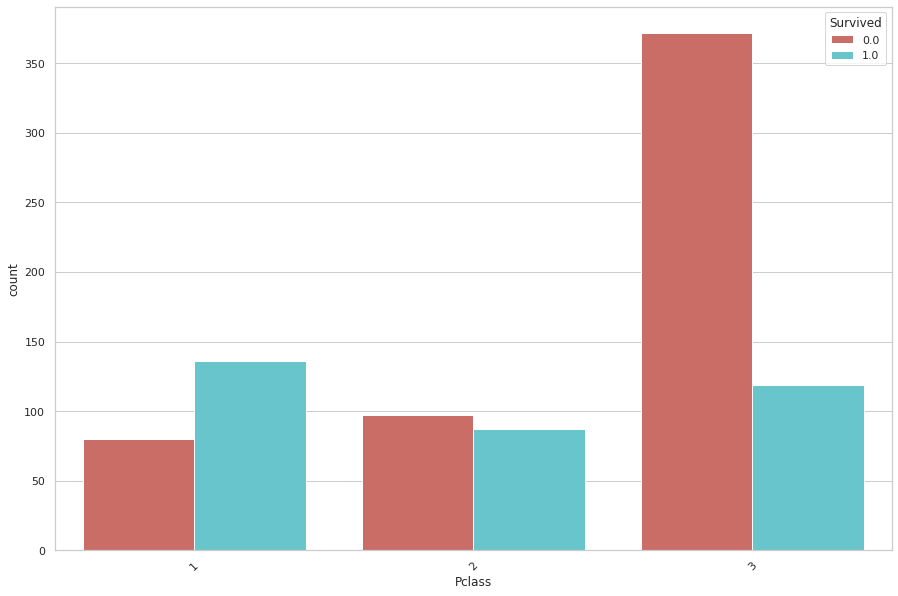

In [8]:
sns.countplot(x='Pclass', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

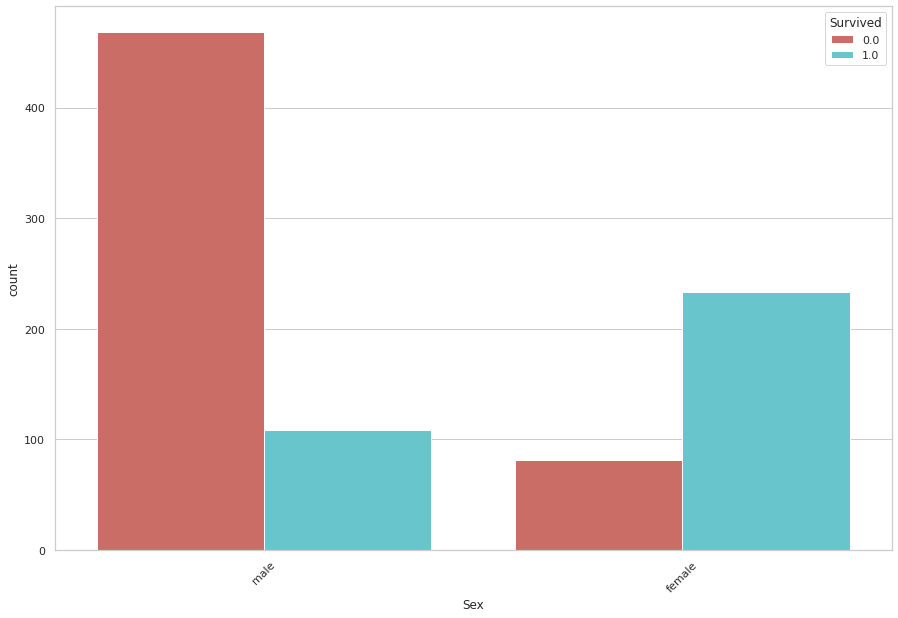

In [9]:
sns.countplot(x='Sex', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

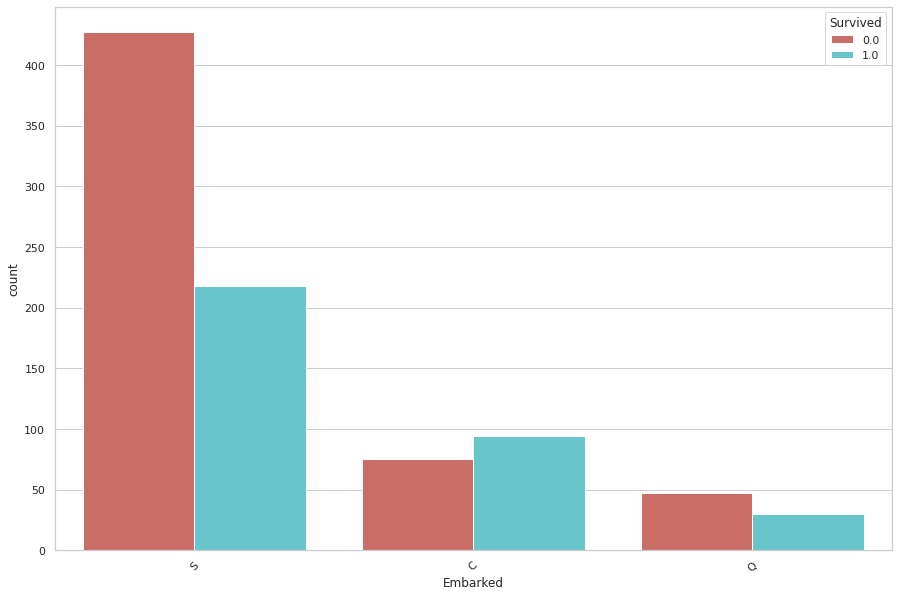

In [10]:
sns.countplot(x='Embarked', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [11]:
# convert to category dtype
df['Sex'] = df['Sex'].astype('category')
# convert to category codes
df['Sex'] = df['Sex'].cat.codes

In [12]:
# subset all categorical variables which need to be encoded
categorical = ['Embarked', 'Title']

for var in categorical:
    df = pd.concat([df, 
                    pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

In [13]:
# drop the variables we won't be using
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [14]:
df.head()

,Age,Family_Size,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,1,7.2500,0,3,1,1,0.0,0,0,1,0,0,0,1,0,0
1,38.0,1,71.2833,0,1,0,1,1.0,1,0,0,0,0,0,0,1,0
2,26.0,0,7.9250,0,3,0,0,1.0,0,0,1,0,0,1,0,0,0
3,35.0,1,53.1000,0,1,0,1,1.0,0,0,1,0,0,0,0,1,0
4,35.0,0,8.0500,0,3,1,0,0.0,0,0,1,0,0,0,1,0,0


In [15]:
train = df[pd.notnull(df['Survived'])]
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(
    train.drop(['Survived'], axis=1),
    train['Survived'],
    test_size=0.2, random_state=42)

In [17]:
for i in [X_train, X_val, X_test]:
    print(i.shape)

(712, 16)
(179, 16)
(418, 16)


In [18]:
rf = RandomForestClassifier(random_state=42)

In [19]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
accuracy_score(y_val, rf.predict(X_val))

0.8379888268156425

In [21]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

In [22]:
X_train.shape

(891, 16)

In [23]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
cross_val_score(rf, X_train, y_train, cv=5)

array([0.77653631, 0.85393258, 0.79213483, 0.83146067, 0.78651685])

In [24]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8081162513338773

In [25]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [26]:
# create the grid
n_estimators = [10, 100, 1000, 2000]
max_depth = [None, 5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

In [27]:
# create the default model
rf = RandomForestClassifier(random_state=42)

# search the grid
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   47.2s finished


In [28]:
grid_result.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=2000, random_state=42)

In [29]:
grid_result.best_params_

{'max_depth': 5, 'n_estimators': 2000}

In [30]:
grid_result.best_score_

0.8338945005611672

In [31]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833895 using {'max_depth': 5, 'n_estimators': 2000}
0.786756 (0.023056) with: {'max_depth': None, 'n_estimators': 10}
0.801347 (0.018027) with: {'max_depth': None, 'n_estimators': 100}
0.806958 (0.015141) with: {'max_depth': None, 'n_estimators': 1000}
0.806958 (0.013837) with: {'max_depth': None, 'n_estimators': 2000}
0.827160 (0.023381) with: {'max_depth': 5, 'n_estimators': 10}
0.832772 (0.016571) with: {'max_depth': 5, 'n_estimators': 100}
0.832772 (0.016571) with: {'max_depth': 5, 'n_estimators': 1000}
0.833895 (0.017887) with: {'max_depth': 5, 'n_estimators': 2000}
0.821549 (0.016722) with: {'max_depth': 10, 'n_estimators': 10}
0.818182 (0.014547) with: {'max_depth': 10, 'n_estimators': 100}
0.818182 (0.021472) with: {'max_depth': 10, 'n_estimators': 1000}
0.814815 (0.021472) with: {'max_depth': 10, 'n_estimators': 2000}
0.786756 (0.023381) with: {'max_depth': 20, 'n_estimators': 10}
0.801347 (0.019244) with: {'max_depth': 20, 'n_estimators': 100}
0.806958 (0.015141) with

In [32]:
# create the grid
leaf_samples = [1, 2, 3, 4, 5, 6]
param_grid = dict(min_samples_leaf=leaf_samples)

# create the model with new max_depth and n_estimators
rf = grid_result.best_estimator_

# search the grid
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   41.8s finished


In [33]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833895 using {'min_samples_leaf': 1}
0.833895 (0.017887) with: {'min_samples_leaf': 1}
0.832772 (0.019309) with: {'min_samples_leaf': 2}
0.832772 (0.019309) with: {'min_samples_leaf': 3}
0.831650 (0.018027) with: {'min_samples_leaf': 4}
0.831650 (0.018027) with: {'min_samples_leaf': 5}
0.832772 (0.019309) with: {'min_samples_leaf': 6}


In [34]:
# create the grid
max_features = [5, 8, 10, 12, None]
bootstrap = [True, False]
param_grid = dict(max_features=max_features, bootstrap=bootstrap)

# create the model with new leaf size
rf = grid_result.best_estimator_

# search the grid
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


In [35]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.832772 using {'bootstrap': True, 'max_features': 5}
0.832772 (0.019309) with: {'bootstrap': True, 'max_features': 5}
0.830527 (0.013837) with: {'bootstrap': True, 'max_features': 8}
0.829405 (0.016571) with: {'bootstrap': True, 'max_features': 10}
0.829405 (0.019309) with: {'bootstrap': True, 'max_features': 12}
0.829405 (0.019504) with: {'bootstrap': True, 'max_features': None}
0.831650 (0.020756) with: {'bootstrap': False, 'max_features': 5}
0.829405 (0.017887) with: {'bootstrap': False, 'max_features': 8}
0.824916 (0.020756) with: {'bootstrap': False, 'max_features': 10}
0.823793 (0.019504) with: {'bootstrap': False, 'max_features': 12}
0.818182 (0.023489) with: {'bootstrap': False, 'max_features': None}


In [36]:
rf = grid_result.best_estimator_

In [37]:
test['Survived'] = rf.predict(X_test)

In [38]:
solution = test[['PassengerId', 'Survived']]
solution['Survived'] = solution['Survived'].apply(int)

<ipython-input-38-045cc2177bcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solution['Survived'] = solution['Survived'].apply(int)


In [39]:
solution.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [41]:
solution.to_csv("/data/Random_Forest_Solution.csv", index=False)